## Les trois zones d’un fichier
Un fichier peut se trouver à trois endroits différents : le répertoire de travail, l’index et le dépôt. Le fichier va se trouver dans les différentes zones selon son avancée dans le projet.

Le schéma suivant montre un projet totalement vierge dans lequel un dépôt Git vient d’être initialisé, c’est-à-dire que nous n’avons enregistré aucun fichier dans le projet. La seule action effectuée sur ce projet est un git init.

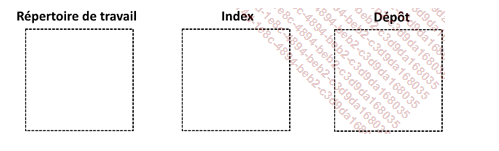

Pour arriver à ce résultat, vous pouvez utiliser les commandes :

    mkdir zoneFichier 
    cd zoneFichier 
    git init 
Pour visualiser l’état des fichiers, nous allons utiliser la commande suivante :

    git status 
Cette commande affiche la sortie suivante :

    git status 
    On branch master 
 
    Initial commit 
 
    nothing to commit (create/copy files and use "git add" to track) 
La commande git status permet d’afficher l’état des fichiers du dépôt. Cette commande va être expliquée à l’aide des exemples qui vont suivre.

Dans l’exemple précédent, la commande git status nous précise qu’aucun fichier n’est à commiter (nothing to commit).

## 1. Le répertoire de travail
Cette zone correspond au répertoire du système de fichiers sur lequel travaille le développeur. C’est le dossier du projet tel qu’il est stocké sur le disque dur. Les fichiers qui se trouvent dans cette zone peuvent être connus de Git selon qu’ils ont été ajoutés au moins une fois dans Git ou non. Un fichier qui se trouve uniquement dans cette zone est un fichier totalement inconnu pour Git.

Ce genre de fichier est également appelé fichier non suivi (untracked file en anglais).


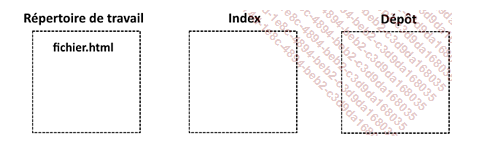

Pour arriver à ce résultat, vous pouvez utiliser les commandes :

    echo "<html>Le fichier est dans le répertoire de travail</html>" 
    > fichier.html 
La commande git status nous indique que le fichier est visualisé en tant que fichier non suivi :

    git status 
    On branch master 
 
    Initial commit 
 
    Untracked files: 
      (use "git add <file>..." to include in what will be committed) 
 
    fichier.html 
 
    nothing added to commit but untracked files present (use "git add" to track) 
Le fichier fichier.html n’est pas suivi par Git. Il n’est pas encore identifié par Git et ne possède donc pas encore d’identifiant sous forme de hash. Git possède une commande de plomberie qui permet de visualiser les fichiers non suivis. Cette commande présente l’avantage d’afficher l’identifiant du fichier lorsque cet identifiant existe. Voici la commande qui permet de visualiser les fichiers non suivis :

    git ls-files --others 
Elle affiche la sortie suivante :

    fichier.html

## 2. L’index
Cette zone utilisée par Git est très particulière. C’est en quelque sorte une zone d’attente de commit indépendante du répertoire de travail. Nous allons y placer les différents fichiers que nous voulons intégrer au prochain commit.

Un fichier qui a été ajouté dans l’index ne sera plus considéré comme un fichier non suivi.

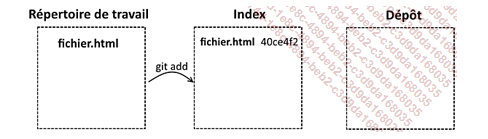

Pour arriver à ce résultat, nous pouvons utiliser la commande suivante :

    git add fichier.html 
La commande git add sera expliquée plus précisément dans la suite de ce guide. En bref, git add permet d’ajouter un fichier à l’index.

La commande git status nous indique que le fichier est prêt à être commité :

    git status 
    On branch master 
 
    Initial commit 
 
    Changes to be committed: 
      (use "git rm --cached <file>..." to unstage) 
 
        new file:   fichier.html 
Cette indication de Git selon laquelle les fichiers sont prêts à être commités signifie qu’ils se situent dans l’index, qui est la zone d’attente avant le commit. La commande de plomberie git ls-files va nous permettre d’afficher les fichiers présents dans l’index et l’identifiant sous forme de hash que Git leur a attribué.
Voici la commande qui va nous permettre d’afficher ces éléments :

    git ls-files --stage 
Elle va afficher la sortie suivante :

    100644 54d5bee5fa3b94e6efaea0cca0e42cee7b46e2e5 0   fichier.html 
Les différents éléments de cette sortie sont expliqués plus en détail dans la documentation officielle de la commande git ls-files (http://git-scm.com/docs/git-ls-files). Pour simplifier, nous remarquons que le fichier fichier.html a correctement été ajouté à l’index et que son identifiant est la chaîne hexadécimale débutant par 54d5bee. Le fait que Git ait attribué un identifiant au contenu du fichier signifie que Git a correctement intégré le fichier dans son système. Cela ne signifie pas pour autant que le fichier est présent dans l’historique du dépôt.

## 3. Le dépôt
Pour que le fichier passe de l’index au dépôt, il faut le commiter. Commiter revient à enregistrer un ensemble de modifications. Le commit est le concept fondamental, de Git, il est expliqué plus en détail dans la suite de ce guide. Une fois qu’un fichier a été commité, il passe alors dans la zone du dépôt.

Dans cette zone, le fichier est versionné par Git qui en contient au moins une version. Le fichier est suivi (tracked) par Git et sera considéré comme modifié si le hash du fichier dans le répertoire de travail est différent du hash enregistré dans le dépôt.

La zone de dépôt contient tous les commits du dépôt. Cela signifie que tout l’historique du projet se situe dans le dépôt.

Pour enregistrer le fichier fichier.html dans le dépôt, il faut utiliser la commande git commit. Le terme « enregistrer » est simplificateur et représente bien plus qu’une simple sauvegarde comme l’explique la suite de ce guide.

    git commit -m "exemple chemin fichier.html" 
Cette commande va créer un paquet virtuel (également appelé commit) contenant un ensemble de modifications avec le titre défini par l’argument -m.

Lorsqu’on exécute cette commande, Git récupère le fichier placé dans l’index et l’ajoute dans le dépôt. Ensuite, Git supprime le fichier de l’index, car étant donné que celui-ci est une zone d’attente, le fichier n’a plus de raison de s’y trouver.

Étant donné que cet exemple est le premier de la commande git commit, il convient de préciser que les bonnes pratiques conseillent un autre formalisme pour le message de commit. Ce formalisme sera expliqué en détail dans la suite de ce guide, mais nombre d’exemples de ces guides utiliseront cette notation pour simplifier leur lecture.

Il est intéressant de vérifier ce qu’affiche la commande git status :

    git status 
    On branch master 
    nothing to commit, working directory clean 
Git nous indique cela car aucun fichier n’est présent dans la zone d’index et la version du projet contenue dans le répertoire de travail correspond à la dernière version du dépôt.

En réalité, pour vérifier s’il y a des modifications, Git compare le répertoire de travail avec HEAD. HEAD est une référence (c’est-à-dire un raccourci de Git) qui pointe vers le commit le plus récent de la branche courante. Expliqué plus simplement, HEAD est la version courante enregistrée dans le dépôt.

Pour afficher les détails du commit (ainsi que son identifiant), il est possible d’utiliser la commande suivante :

    git log -1 
Cette commande va afficher la sortie suivante :

    commit e23586086614ee21b8586ef09cff726ec5f95d27 
    Author: Samuel DAUZON <git@dauzon.com> 
    Date:   Fri Jul 17 23:29:49 2015 +0200 
 
    exemple chemin fichier.html 
Cette sortie permet notamment d’afficher l’identifiant du commit représenté ici par la chaîne hexadécimale commençant par e235860.

De la même manière que lorsque le fichier se trouvait dans l’index, il est possible de l’afficher maintenant qu’il est dans le dépôt avec la commande suivante :

    git ls-tree -r HEAD 
Cette commande affiche presque la même sortie que lorsque le fichier était dans l’index :

    100644 blob 54d5bee5fa3b94e6efaea0cca0e42cee7b46e2e5 fichier.html

Un élément supplémentaire est affiché dans cette sortie : le mot blob. Celui-ci signifie binary large object, c’est un type d’objet interne à Git qui est chargé de stocker l’intégralité du contenu d’un fichier. Dans le dépôt, c’est en réalité le blob qui est identifié par un hash.
Il existe un autre type d’objet stocké par Git : les trees. Là où les blobs représentent les fichiers, les trees représentent les dossiers. Les trees sont des objets contenant le chemin du dossier ainsi qu’une liste d’objets Git descendants. Cette liste contiendra des objets de type tree ou blob de la même manière qu’un répertoire contient des fichiers et des répertoires.
La sortie de git ls-tree nous indique d’ailleurs que l’identifiant du blob est identique à celui du fichier dans l’index. Cela garantit que le fichier n’a pas été modifié entre l’index et le dépôt.

Le schéma ci-dessous récapitule l’état des trois zones ainsi que le détail des éléments stockés dans le dépôt.

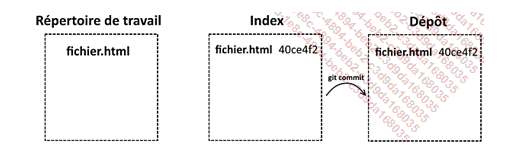

# Manipuler les fichiers
##1. Ajouter des fichiers dans l’index
Il existe deux cas où il est utile d’ajouter un fichier à l’index.

Le premier cas est celui où le fichier est nouveau et inconnu de Git. Ajouter ce nouveau fichier dans l’index va permettre de prévenir Git que ce fichier doit être pris en compte. Comme expliqué précédemment, ce fichier passera d’un état non suivi à un état suivi par Git.

Le deuxième cas est celui où le fichier est déjà versionné, mais que le développeur souhaite mettre les modifications effectuées dans ce fichier dans l’index pour les commiter.

Pour ajouter un fichier dans l’index, il faut utiliser la commande git add avec la syntaxe suivante :

    git add nom_fichier 
Il existe également des manières d’ajouter plusieurs fichiers dans l’index à l’aide d’une seule commande. Par exemple, pour ajouter tous les fichiers dans le dépôt, vous devez utiliser la commande suivante :

    git add -A 
Les bonnes pratiques recommandent de ne pas utiliser cette commande. En effet, en utilisant cette commande, il est possible d’ajouter des fichiers dont nous ne voulons pas dans notre dépôt. Ces fichiers peuvent être des fichiers temporaires créés par le système ou tout autre fichier qui n’a pas sa place dans le dépôt.

## 2. Déplacer ou renommer des fichiers
Git possède une commande qui permet de renommer ou de déplacer un fichier. Voici la syntaxe de cette commande :

    git mv ancien_fichier nouveau_fichier 
Voici par exemple comment renommer le fichier fichier.html en index.html :

    git mv fichier.html index.html 
La commande git status nous affiche la sortie suivante :

    On branch master 
    Changes to be committed: 
      (use "git reset HEAD <file>..." to unstage) 
 
      renamed:    fichier.html -> index.html 
Cette sortie indique que le fichier a été ajouté à l’index et qu’il est détecté comme étant renommé.

La commande ls -l qui permet de visualiser la liste de fichiers et de dossiers du répertoire courant affiche la sortie suivante :

    total 8 
    -rw-r--r--  1 dauzon  staff  59 16 jul 23:49 index.html 
Cette sortie indique que Git a bien renommé le fichier dans le répertoire de travail en plus de changer l’état du fichier dans l’index.

## 3. Supprimer des fichiers
Pour supprimer un fichier suivi par Git, il ne faut pas uniquement le supprimer dans le système de fichiers. Git nous propose une commande qui permet de supprimer le fichier dans le répertoire de travail, mais également de placer cette suppression dans la zone d’index pour qu’au prochain commit Git sache que le fichier ne doit plus être suivi. Il faut utiliser la syntaxe suivante :

    git rm nom_fichier 
Par exemple, dans le cas où un fichier nommé fichier.htmlexiste dans le répertoire de travail :

    git rm fichier.html 
La commande git status indique que le fichier a été supprimé et que cette suppression est prête à être commitée. Voici la sortie qu’affiche git status :

    On branch master 
    Changes to be committed: 
     (use "git reset HEAD <file>..." to unstage) 
 
      deleted:    fichier.html 
Pour obtenir le même comportement, il est également possible d’utiliser les deux commandes suivantes :

    rm fichier.html 
    git add fichier.html 
La première commande supprime le fichier dans le répertoire de travail et la deuxième commande permet d’ajouter cette suppression dans l’index.

## 4. Arrêter de suivre un fichier
Plusieurs raisons peuvent pousser un développeur à vouloir arrêter de suivre un fichier sans le supprimer. Un exemple typique de ce genre de cas est lorsqu’un développeur ajoute par erreur un fichier de log (ou n’importe quel autre type de fichier qu’on ne versionne pas) dans le dépôt. Le développeur a envoyé son commit au serveur central et à partir de ce moment-là il ne peut pas revenir en arrière, il doit donc arrêter de suivre le fichier ajouté par erreur sans pour autant le supprimer.

Pour cela, il faut utiliser la syntaxe suivante :

    git rm --cached nom_fichier 
Par exemple, dans le cas où un fichier nommé fichier.html est présent dans le dépôt et dans le répertoire de travail :

    git rm --cached fichier.html 
## 5. Ignorer des fichiers
Dans le chapitre Création d’un dépôt qui explique comment créer et configurer un dépôt, la section Ignorer des fichiers présente de quelle manière configurer le fichier .gitignore permettant d’ignorer un certain nombre de fichiers.

En effet, il existe plusieurs types de fichiers qui ne doivent pas être commités. Voici une liste non exhaustive des fichiers qui ne doivent pas être versionnés :

les fichiers de logs,

les fichiers résultants d’une compilation,

les fichiers des bibliothèques (ce cas particulier est abordé dans le chapitre Les outils de Git, à la section Dépôts intégrés avec submodules),

les fichiers de configuration (surtout lorsqu’ils contiennent des données sensibles).

Ces fichiers seront spécifiés dans le fichier .gitignore qui sera stocké à la racine du dépôt. Les règles de syntaxe du fichier .gitignore sont les suivantes :

Les lignes vides sont ignorées. Elles peuvent donc servir de séparateur pour aérer le fichier.

Les lignes débutant par un dièse # sont considérées comme des commentaires et n’ont aucune incidence sur les fichiers ignorés.

Une ligne contenant un chemin complet suivi du nom d’un fichier exclut uniquement le fichier ciblé.

Il est possible d’utiliser un ou plusieurs astérisques pour spécifier plusieurs noms de fichier à l’instar de ce qui est possible avec une interface en ligne de commande.

Une ligne composée uniquement d’un nom de fichier ou de dossier exclut les fichiers portant ce nom quel que soit le dossier dans lequel ils se trouvent. Pour spécifier un fichier se situant à la racine du dépôt, il faut le préfixer par un slash comme si le chemin absolu du fichier débutait au niveau du dépôt.

Un point d’exclamation en début de ligne signifie que les fichiers ciblés ne seront pas ignorés.

Ci-dessous un exemple de fichier .gitignore simple :

    # Ignorer tous les dossiers lib (qui contiennent des bibliothèques) 
    lib/ 
    # Autoriser le versionnement des bibliothèques internes 
    !lib/interne/ 
    # Ignorer tous les fichiers Python semi-compilés 
    *.pyc 
    __pycache__ 
    # Ignorer tous les exports de documentation, mais pas les originaux 
    /documentation/* 
    !/documentation/*.md 
Le fichier .gitignore doit être enregistré à la racine du dépôt pour être interprété par Git. Ce fichier sera versionné, car il correspond à toutes les exclusions qui doivent être faites pour le projet.

Il existe un autre type de fichier servant à ignorer des fichiers dont la configuration a été évoquée dans le chapitre Création d’un dépôt à la section Ignorer des fichiers. Ce fichier est global et sert à ignorer les fichiers propres à l’utilisateur. Par exemple, ceux qui utilisent des IDE tels que PyCharm ont l’habitude de voir apparaître à la racine de leur projet un dossier .idea contant les fichiers utilisés par PyCharm pour gérer le projet. Ce n’est pas au fichier .gitignore d’ignorer ce type de fichiers, car ces fichiers ne dépendent pas du tout du projet, mais de l’utilisateur. En effet, rien n’empêche un développeur d’utiliser un autre éditeur comme Sublime Text ou encore Eclipse. Pour cela, il faudra utiliser le fichier .gitignore_global défini avec l’option de configuration core.excludesfile. Ce fichier possède exactement la même syntaxe que le fichier .gitignore.

## Commiter ou enregistrer des modifications
##1. Effectuer un premier commit
Le commit est l’élément central de Git. C’est lui qui enregistre toutes les modifications du projet. Un commit doit représenter un ensemble de modifications cohérentes entre elles.

C’est-à-dire qu’un commit ne doit pas servir à sauvegarder des données. Un système de gestion de versions n’est pas un système de sauvegarde. Beaucoup de développeurs qui débutent voient le système de version comme un système qui leur sert à sauvegarder des modifications.

Un exemple permettra de mieux comprendre la philosophie du commit. Le développeur commence à travailler sur une nouvelle fonctionnalité. S’il part en vacances alors que son développement est en cours, il ne va pas commiter ses modifications juste pour faire une sauvegarde. Éventuellement, il aura séparé la nouvelle fonctionnalité en plusieurs petites nouvelles fonctionnalités pour les commiter séparément.

Plus simplement, un commit est un paquet virtuel de modifications. Par exemple, en utilisant un dépôt vierge dans lequel seraient ajoutés deux fichiers vides :

index.html

style.css

Le développeur code dans ces fichiers une page très simple pour un client désirant juste avoir ses coordonnées sur un site web (le code d’exemple est volontairement simpliste).

Après avoir ajouté ses fichiers à l’index, le développeur commite les modifications avec :

    git commit -m "Page de coordonnées" 
Par la suite, le développeur ajoute le numéro de téléphone à la liste de coordonnées et commite ses modifications :

    git commit -m "Coordonnées : ajout téléphone" 
la commande git log permet de lister les commits ajoutés au dépôt :

    git log 
    commit a2ab800 
    Author: Samuel DAUZON <git@dauzon.com> 
    Date:   Mon Jul 20 23:25:31 2015 +0200 
 
      Coordonnées : ajout téléphone 
 
    commit 1480de2 
    Author: Samuel DAUZON <git@dauzon.com> 
    Date:   Mon Jul 20 23:16:48 2015 +0200 
 
    Page de coordonnées 
Cette sortie affiche les deux commits du dépôt. Le but des commits est de suivre fidèlement la vie du projet. Ici, il est possible d’imaginer que le client avait demandé une page simpliste avec son adresse. Après avoir vu le résultat, il s’est rendu compte qu’il voulait aussi afficher son numéro de téléphone. Le développeur a donc modifié la page et commité ses modifications.

## 2. Rédiger un bon message de commit
Dans Git, la partie visible d’un commit pour les collaborateurs est le message de commit. Ce message est très (mais vraiment très) important, car il doit résumer en très peu de mots ce qui a été réalisé dans le commit. C’est un exercice difficile de trouver le bon message.

Beaucoup trop de développeurs passent quatre ou cinq heures à développer quelque chose puis bâclent le message de commit en dix secondes (surtout le titre), car pour eux "c’est secondaire". Non, non et non !

Ce message sera lu de nombreuses fois par tous les collaborateurs du projet. Peut-être même que dans six mois, le développeur cherchera (avec git blame, commande abordée dans le chapitre Consultation et manipulation de l’historique, à la section Identifier l’auteur d’une ligne de code) les détails concernant une ligne de code qu’il ne comprend pas. Il consultera donc les détails du commit et la première chose qu’il verra est ce message.

Ce message est primordial et ne coûte presque rien au développeur. Il suffit de passer une ou deux minutes (cela paraît court, mais finalement c’est suffisamment long pour prendre son temps) pour rédiger un message de qualité qui peut faire gagner plusieurs minutes voire plusieurs heures à tous les développeurs sur le long terme.

## a. Les règles d’un message de commit
Un message de commit est divisé en deux parties séparées par une ligne vide :

le titre du message de commit, qui ne doit pas dépasser 49 caractères,

le message du commit, qui peut être plus complet.

Le titre du message est la partie la plus compliquée, car il faut résumer en 49 caractères ce qui a été fait. Le reste du message est plus simple, mais doit tout même être rédigé avec soin. Si un développeur reçoit des demandes d’un client par mail, il ne doit pas copier/coller le mail du client en tant que message de commit, car ce mail contient beaucoup d’informations inutiles pour les autres développeurs.

En résumé, le titre du message doit être très concis et le reste du message doit expliquer de manière claire les modifications effectuées.

Dans la suite de ce livre, ces principes ne seront pas suivis pour une bonne raison. Il est plus lisible d’utiliser la syntaxe à une ligne pour enregistrer un commit. Il faut cependant garder à l’esprit qu’un bon message du commit simplifie la vie de tout le monde sur le long terme.

## b. Méthode pour le titre
Lorsqu’on travaille sur un dépôt, il s’agit d’accorder un grand soin à la rédaction du titre du commit. Il convient tout d’abord de rédiger le message du commit en expliquant les modifications qu’il contient, puis de rédiger un premier titre sans chercher à être concis, comme dans l’exemple suivant :

Fonctionnalité : Je teste si l'élève a bien fait l'exercice pour 
lui afficher le suivant. 
C’est le cas typique d’un titre que beaucoup de développeurs utilisent. Il fait 89 caractères, soit 40 de trop. Il faut donc le raccourcir intelligemment.

Tout d’abord, il est déconseillé d’utiliser des mots-clés comme correctif ou fonctionnalité. Par exemple, le mot-clé correctif peut facilement être remplacé par le mot fix, qui signifie la même chose en seulement trois caractères. Pour désigner les nouvelles fonctionnalités, il est possible de n’utiliser aucun mot-clé, étant donné que si le développement ne concerne pas un correctif, il concerne de fait une nouvelle fonctionnalité.

Le chapitre Git-Flow : workflow d’entreprise traitera plus longuement de la distinction entre les correctifs et les nouvelles fonctionnalités où la séparation entre ces deux types de modifications sera plus forte qu’un simple mot-clé.

Il convient ensuite de chercher les mots qui définissent le contexte et ceux qui définissent l’action. Ici, le contexte est défini par les mots élève et exercice. L’action est définie par les mots teste, fait, afficher, suivant.

Il faut ensuite modifier les termes vagues : ici, le mot fait peut être remplacé par terminé. Le mot teste d’ailleurs possède une forte connotation en développement, il faut donc le remplacer par le mot si qui permet d’avoir une phrase plus naturelle tout en étant plus courte.

Il faut placer les mots de contexte au début avec une hiérarchie qui dépend du projet. Voici donc la partie contexte du titre :

Elève -> Exercice 
Déjà 17 caractères sont utilisés (même si nous aurions pu supprimer les espaces si nous en avions réellement besoin) et pourtant ces 17 caractères sont très utiles. Ce sont ces caractères qui permettent à n’importe qui de savoir où se situe l’action qui va suivre.

Pour la partie action, il faut rédiger une phrase très concise à partir des mots restants. Par exemple, dans ce cas-là :

Si terminé, afficher suivant 
On remarque bien que sans le contexte la partie action ne signifie rien, d’où l’importance réelle des deux parties. Je relie ensuite les deux parties de cette chaîne avec le signe :. Voici le message final :

Elève -> Exercice : Si terminé, afficher suivant 
Ce titre, qui comprend 48 caractères, est parfaitement compréhensible et lisible. Si votre titre dépasse de quelques caractères, vous pouvez en gagner quelques-uns. Par exemple, beaucoup de développeurs préfèrent le slash pour définir le lien hiérarchique, pour arriver à ce message de 45 caractères :

Elève/Exercice : Si terminé, afficher suivant 
Si vous souhaitez encourager l’utilisation d’un modèle de commit, vous pouvez utiliser le paramètre de configuration commit.template pour donner un exemple aux développeurs. Vous trouverez plus d’informations sur cette option de configuration dans le chapitre Création d’un dépôt.

Si malgré cette méthode le message est trop long, c’est que le commit contient peut-être trop de modifications et aurait pu être partagé en plusieurs développements plus petits. Il est préférable de commiter de petites modifications au lieu de grouper ces modifications en un gros commit monstrueux.

## c. En quelle langue ?
Les bonnes pratiques nous demandent très souvent de ne travailler qu’en anglais parce que même si le projet est français, nous ne sommes jamais certains qu’il ne sera pas internationalisé à un moment ou à un autre.

Dans la pratique, si un développeur n’est pas bilingue il est préférable qu’il écrive un bon message français plutôt qu’un mauvais message anglais.

Il est conseillé d’utiliser le français dans toutes les entreprises, excepté :

les entreprises qui font appel à des prestataires étrangers qui peuvent être amenés à regarder le dépôt,

les entreprises qui publient des codes libres sur GitHub ou d’autres plateformes internationales,

les entreprises dont tous les développeurs maîtrisent bien l’anglais et qui seront en mesure de former leurs nouveaux collaborateurs à l’anglais si ceux-ci ont des difficultés.

Les accents peuvent parfois poser problème selon la configuration de votre système. Utiliser l’anglais dans les messages de commit vous épargnera peut-être des soucis d’encodage.